In [1]:
from matplotlib import pyplot as plt, patches as mpatches
import math
from math import tan, atan2
import numpy as np
from numpy import sin, cos, pi, linspace
import random
from Robot import Robot, p_lim
from ParticleFilter import ParticleFilter

/tmp/ipykernel_43771/3898829977.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,20))


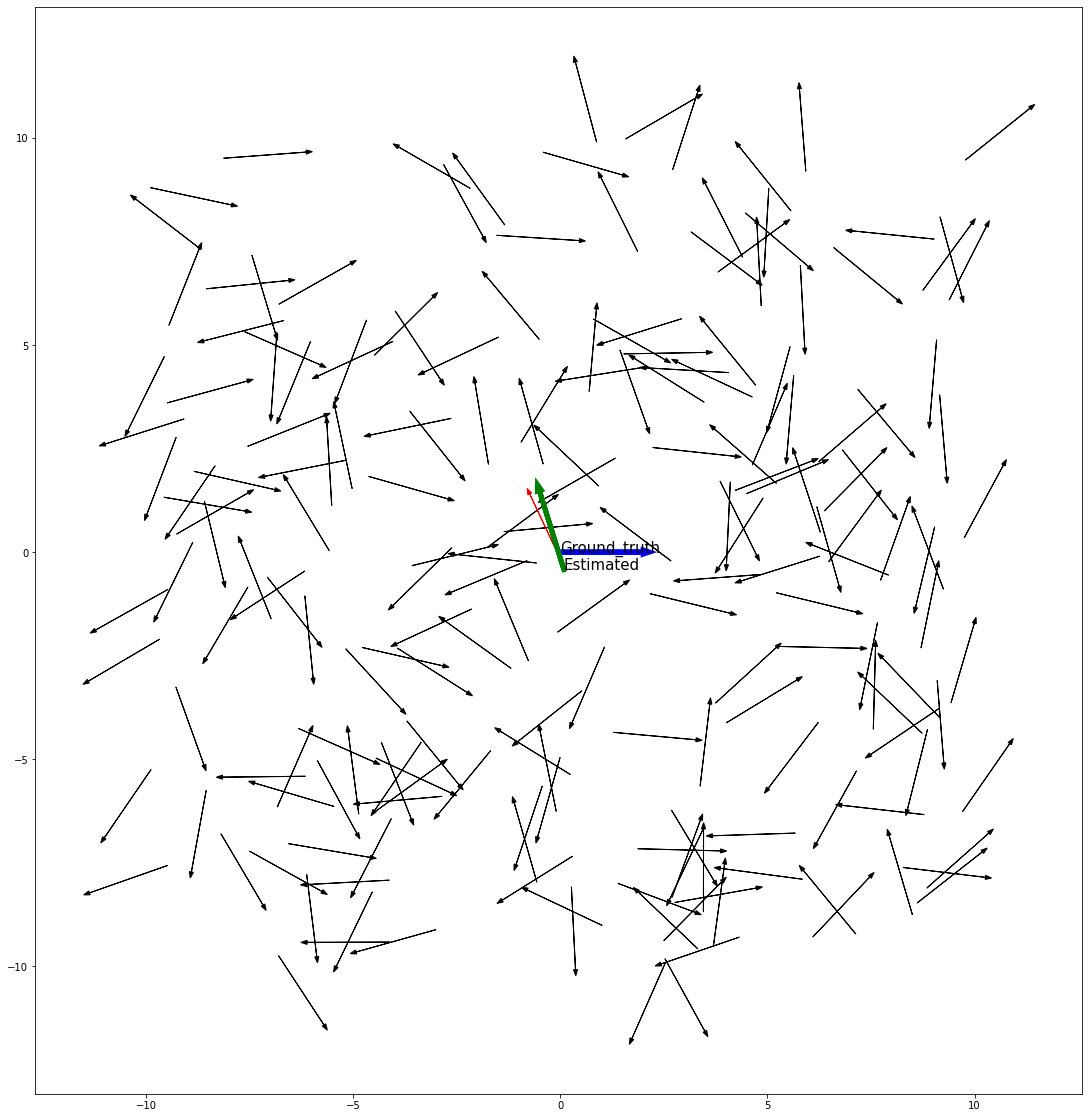

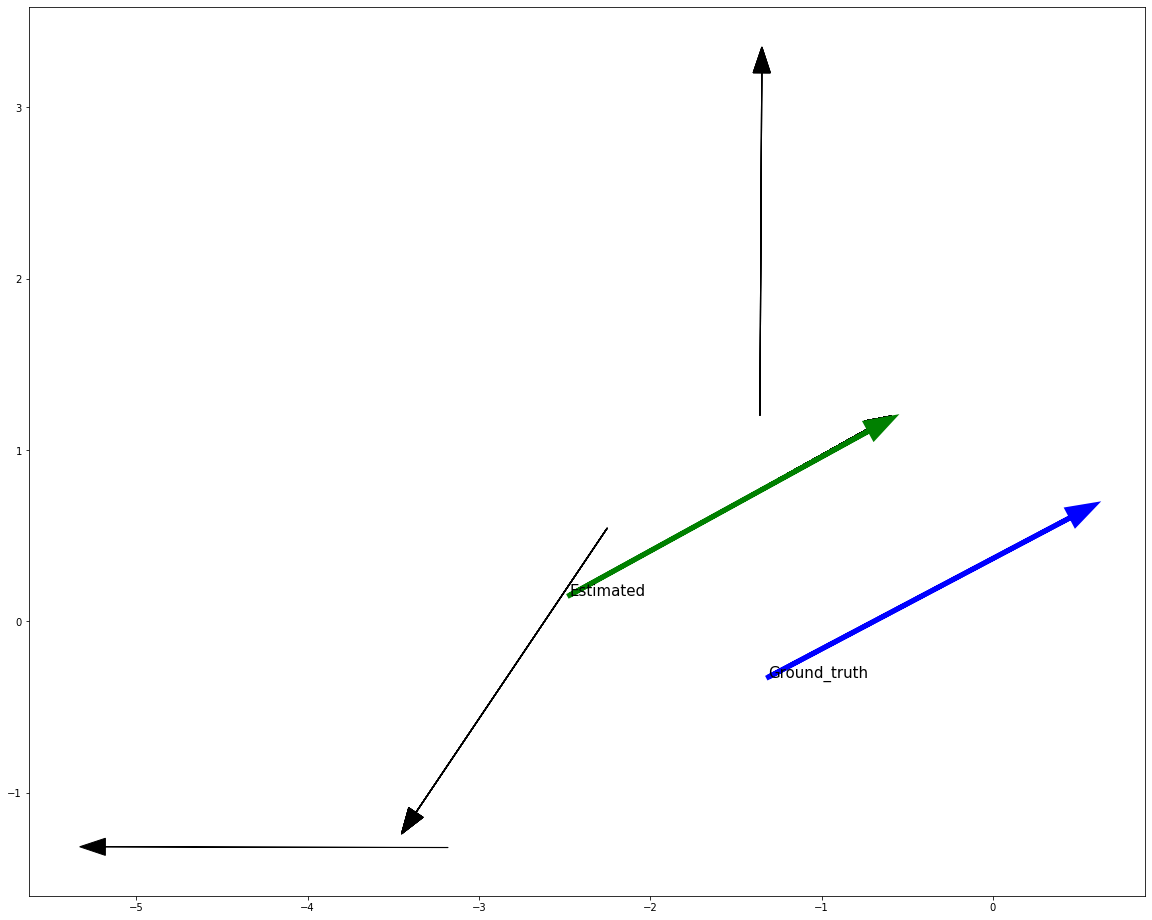

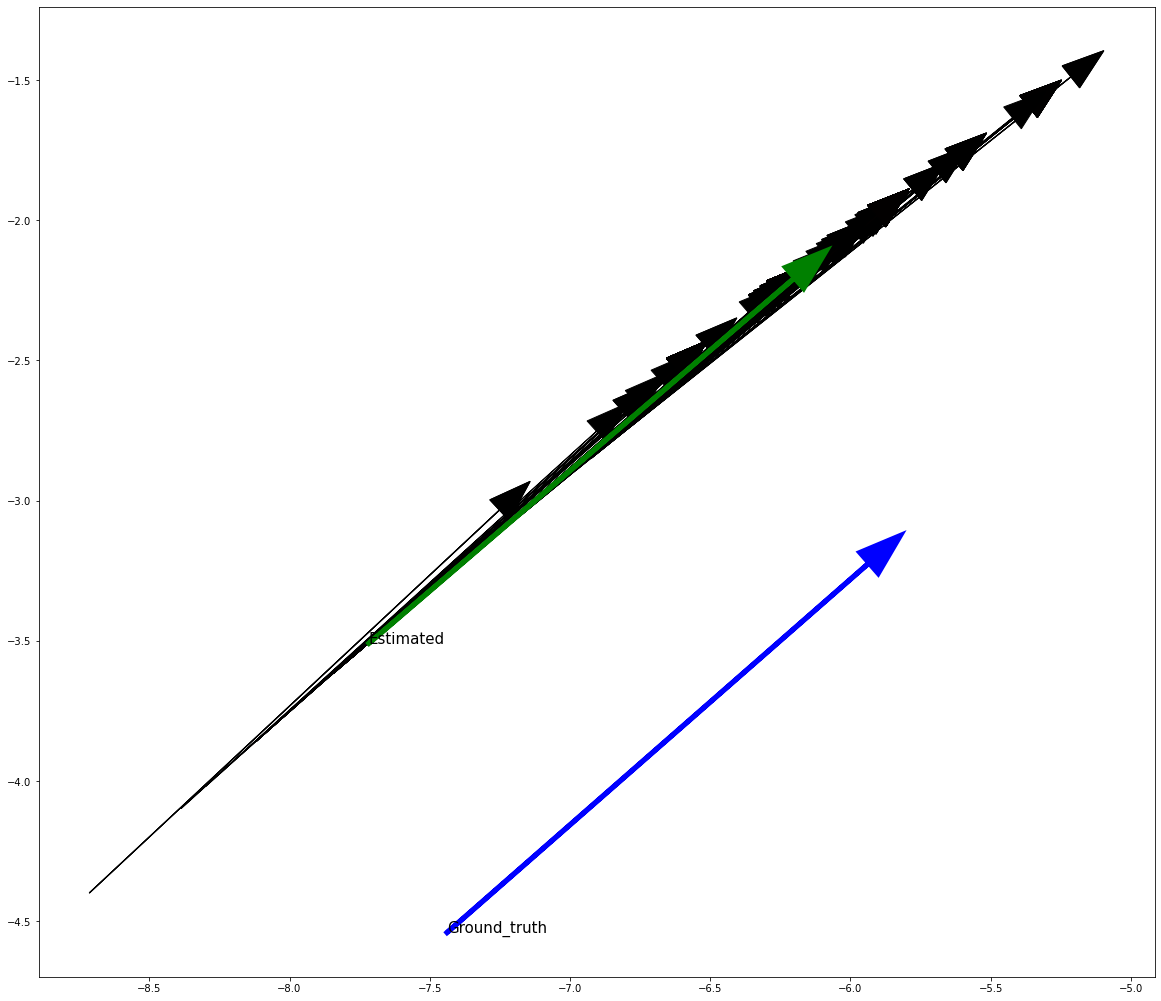

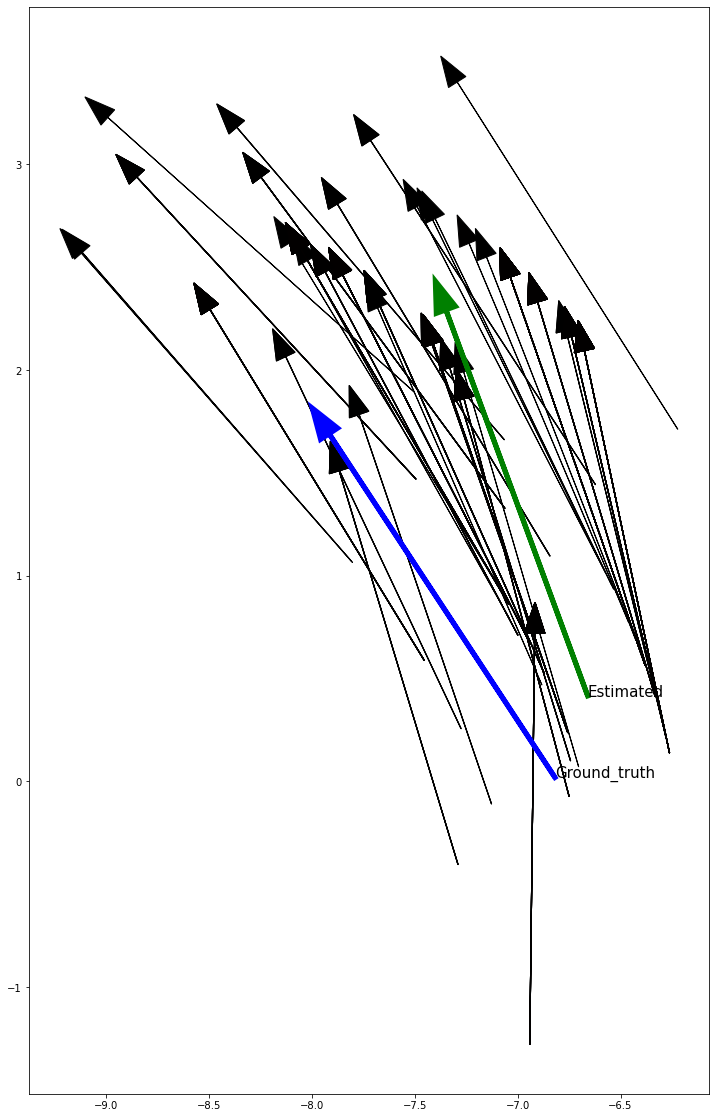

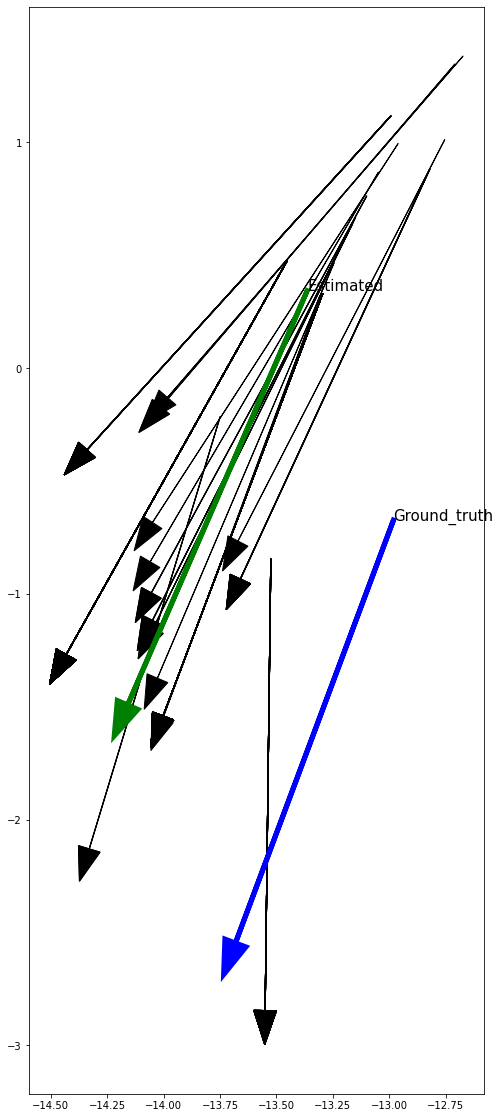

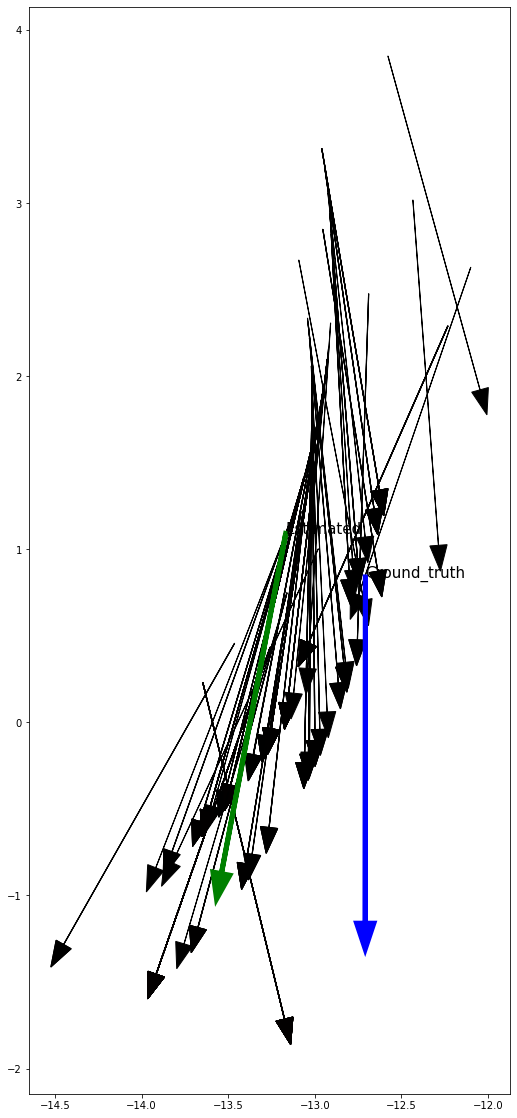

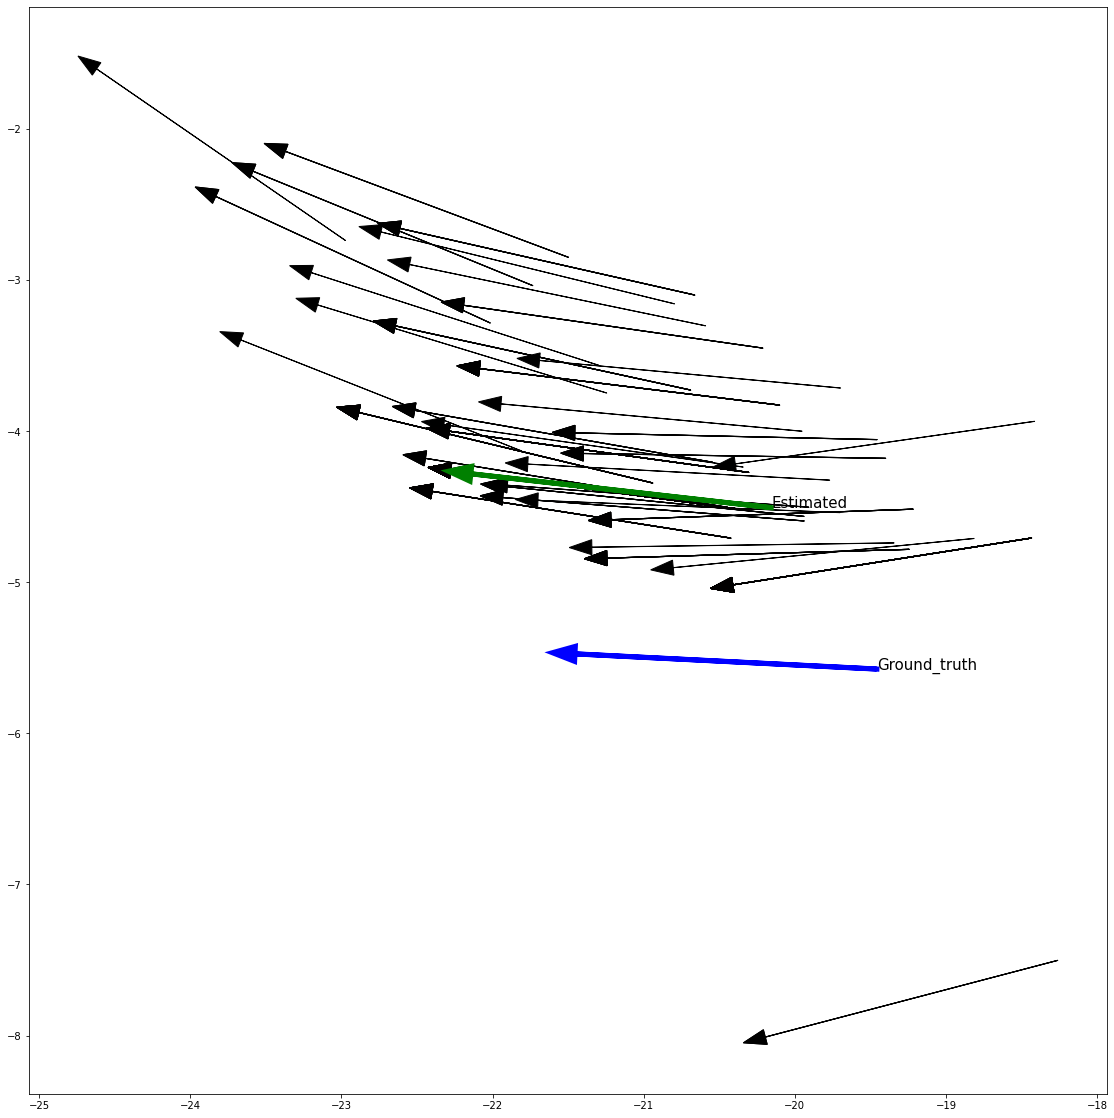

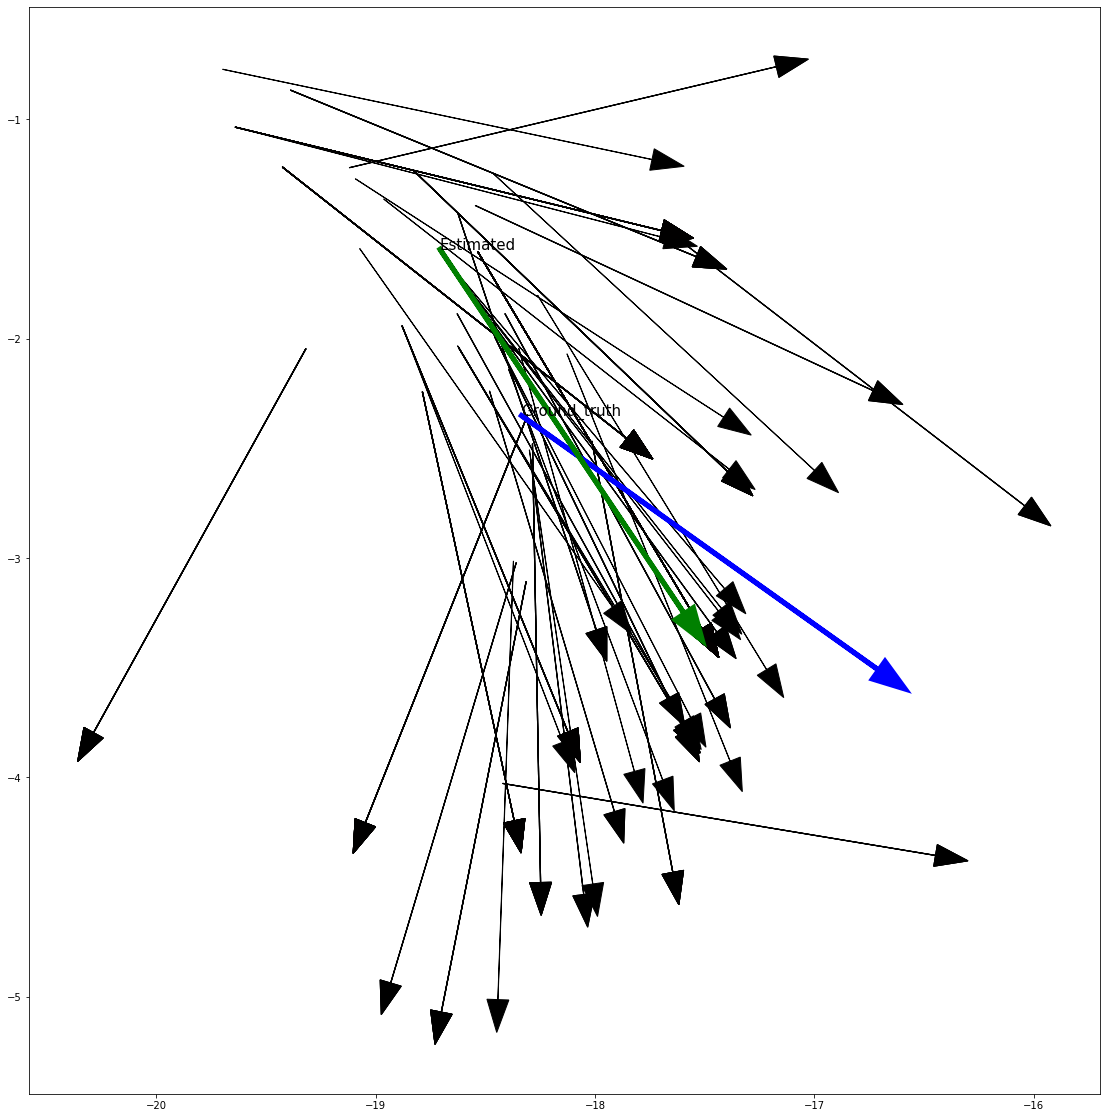

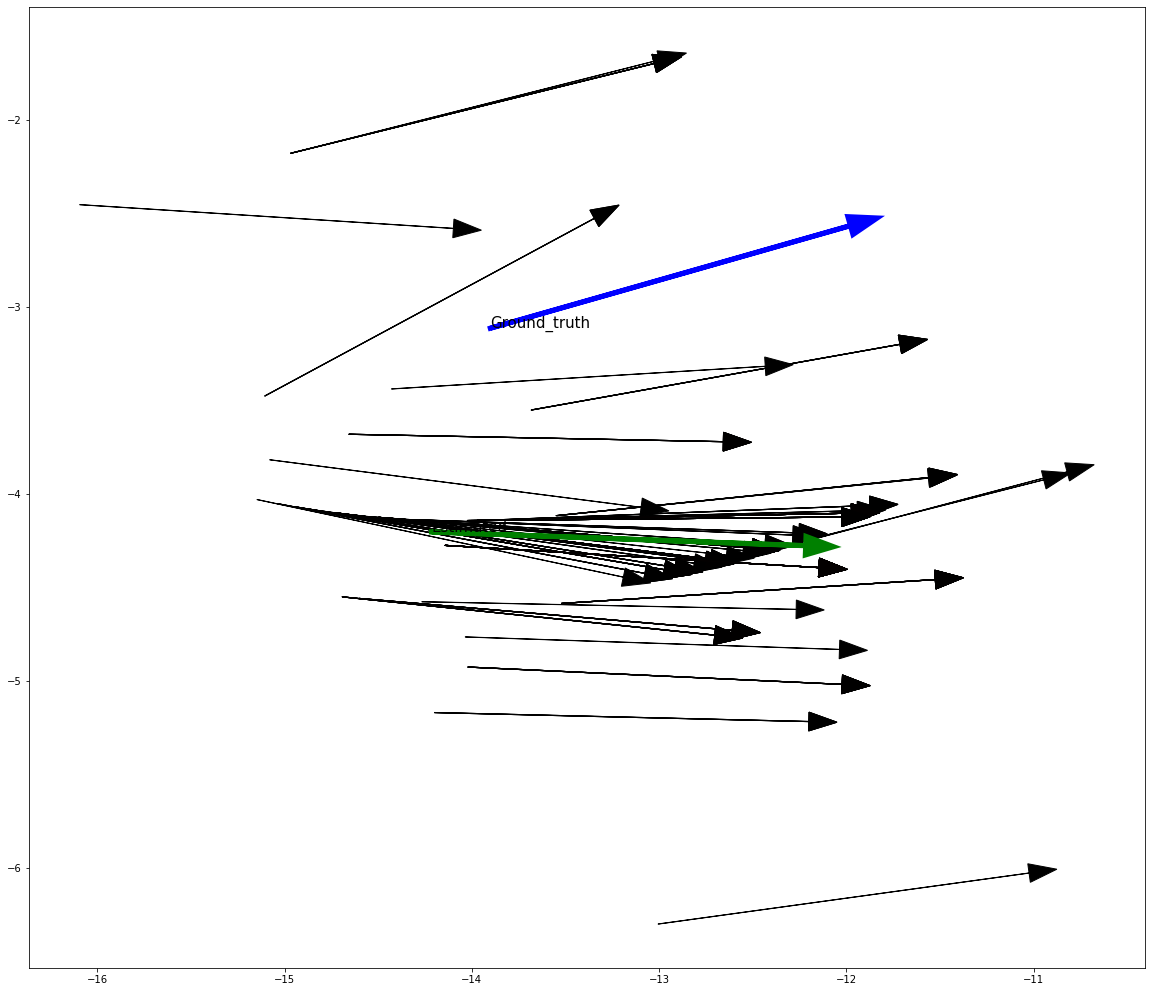

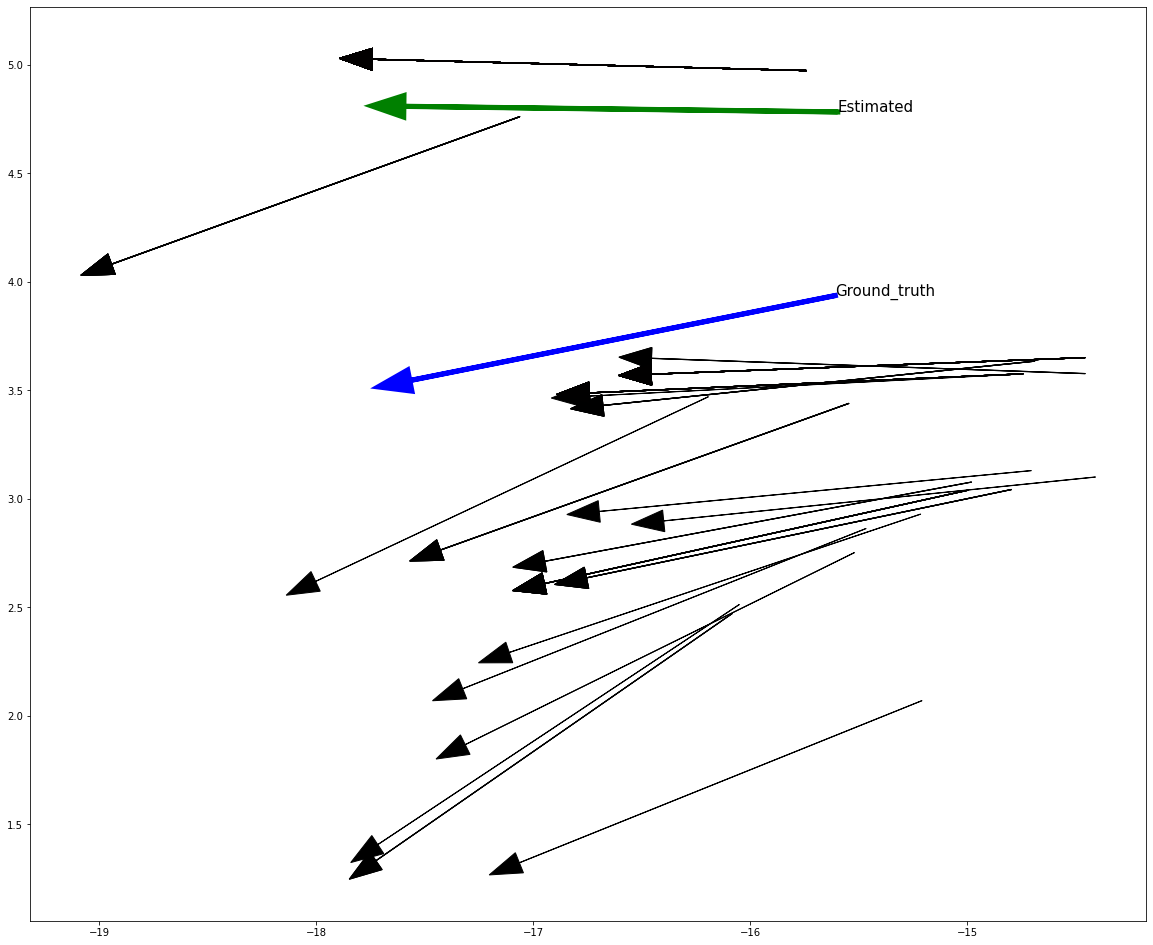

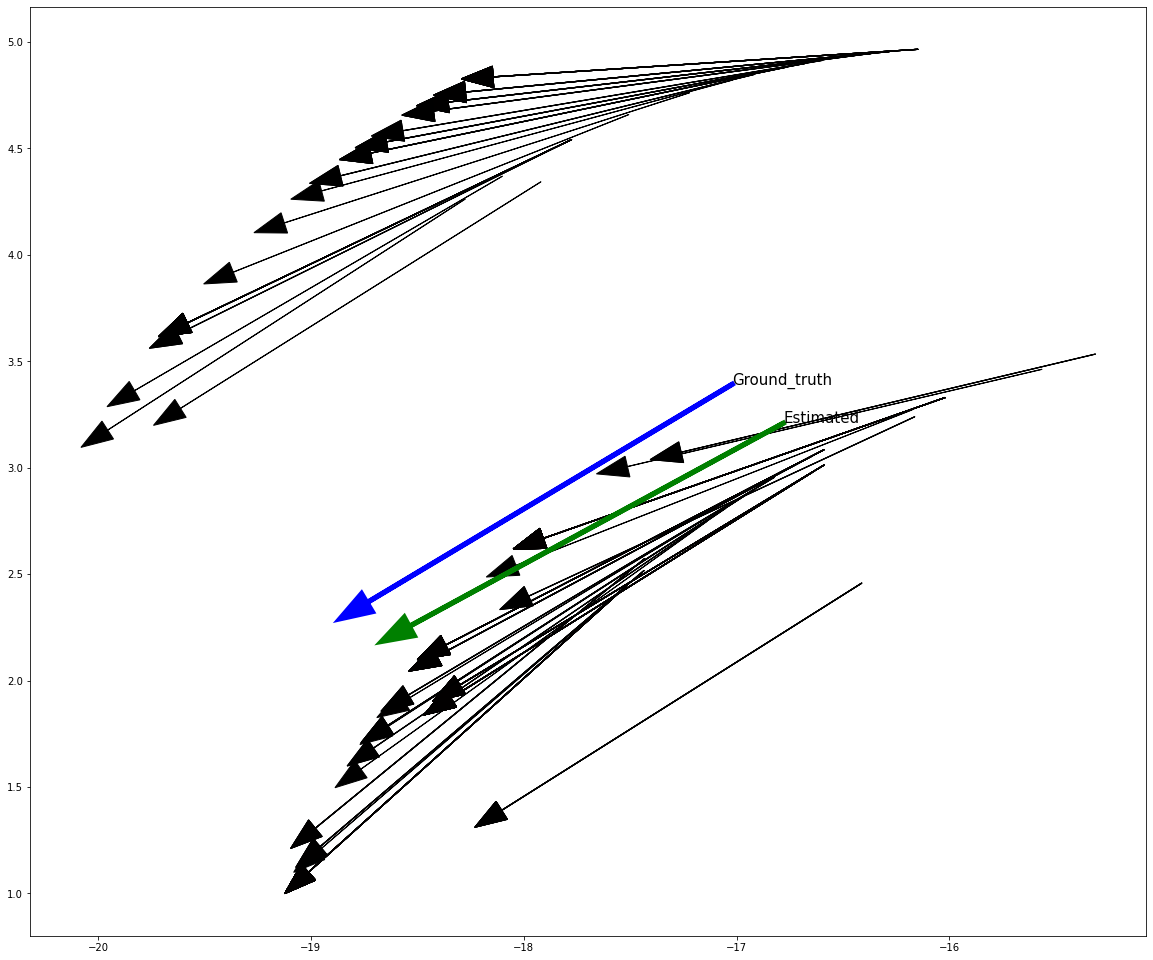

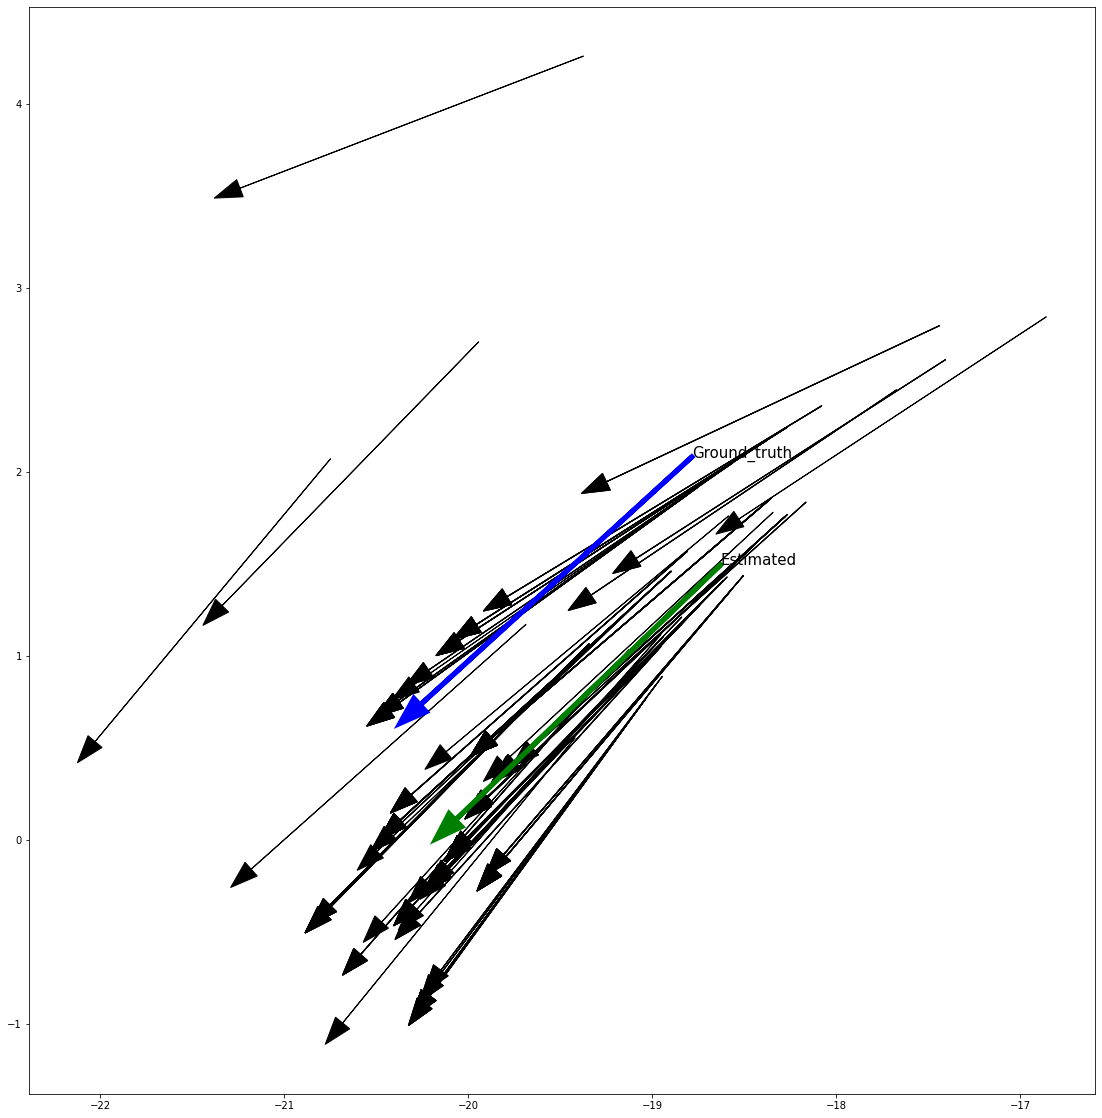

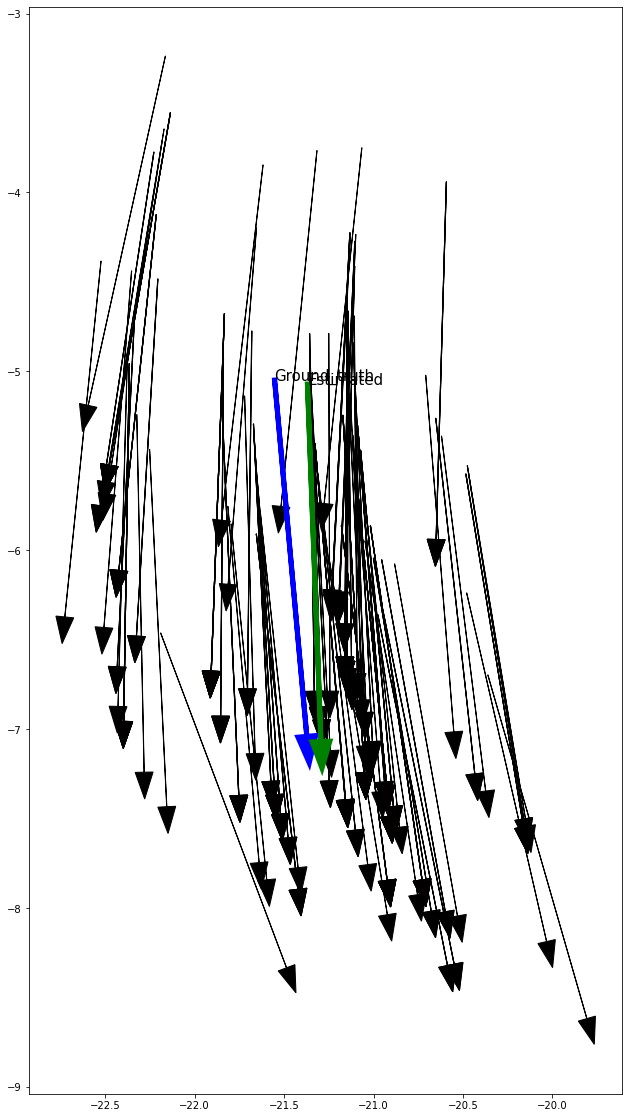

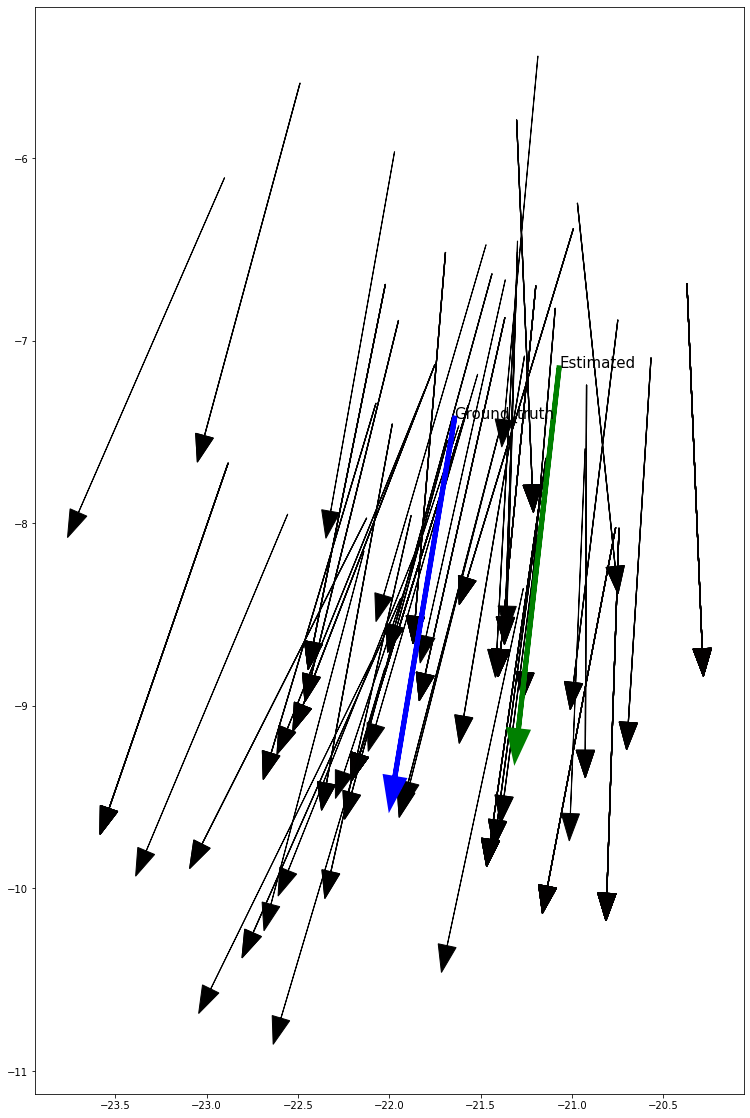

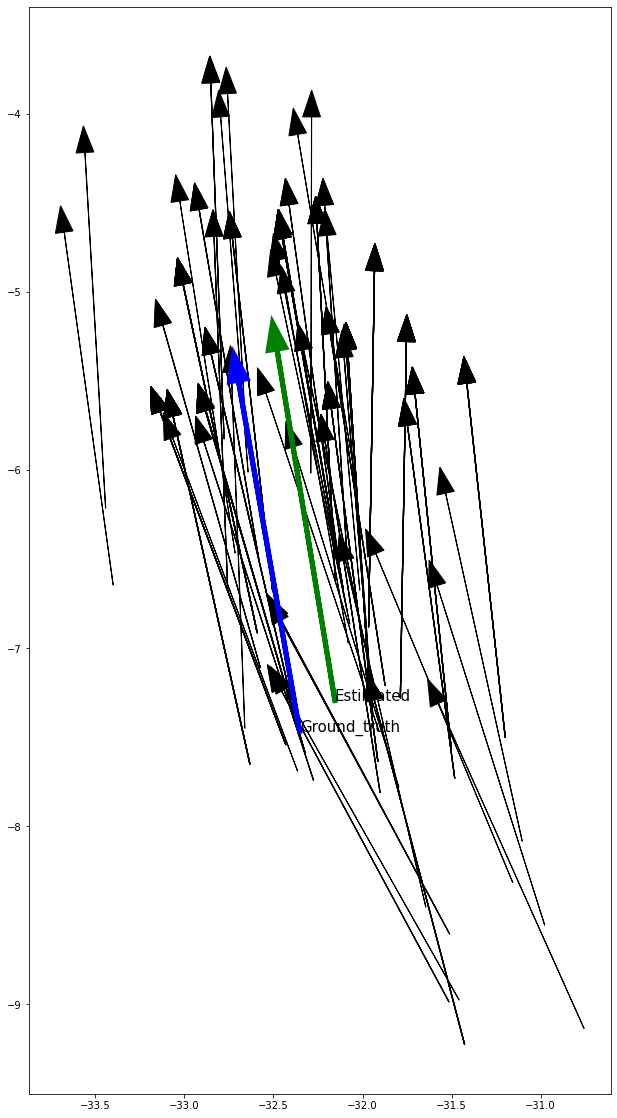

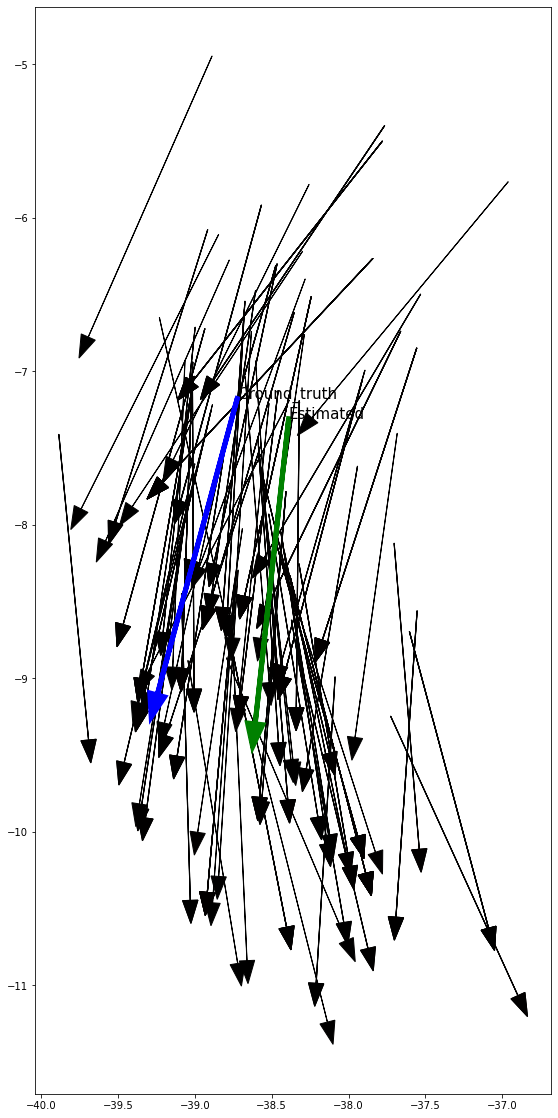

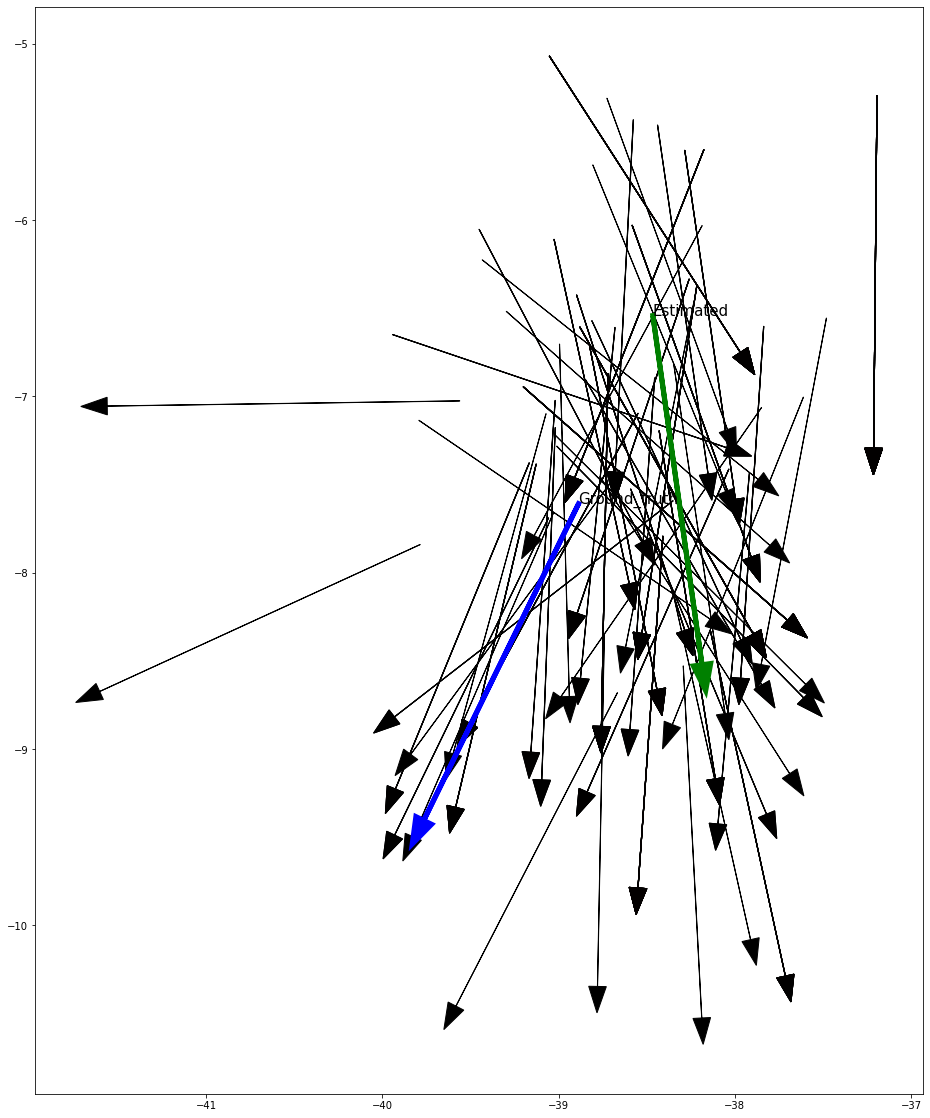

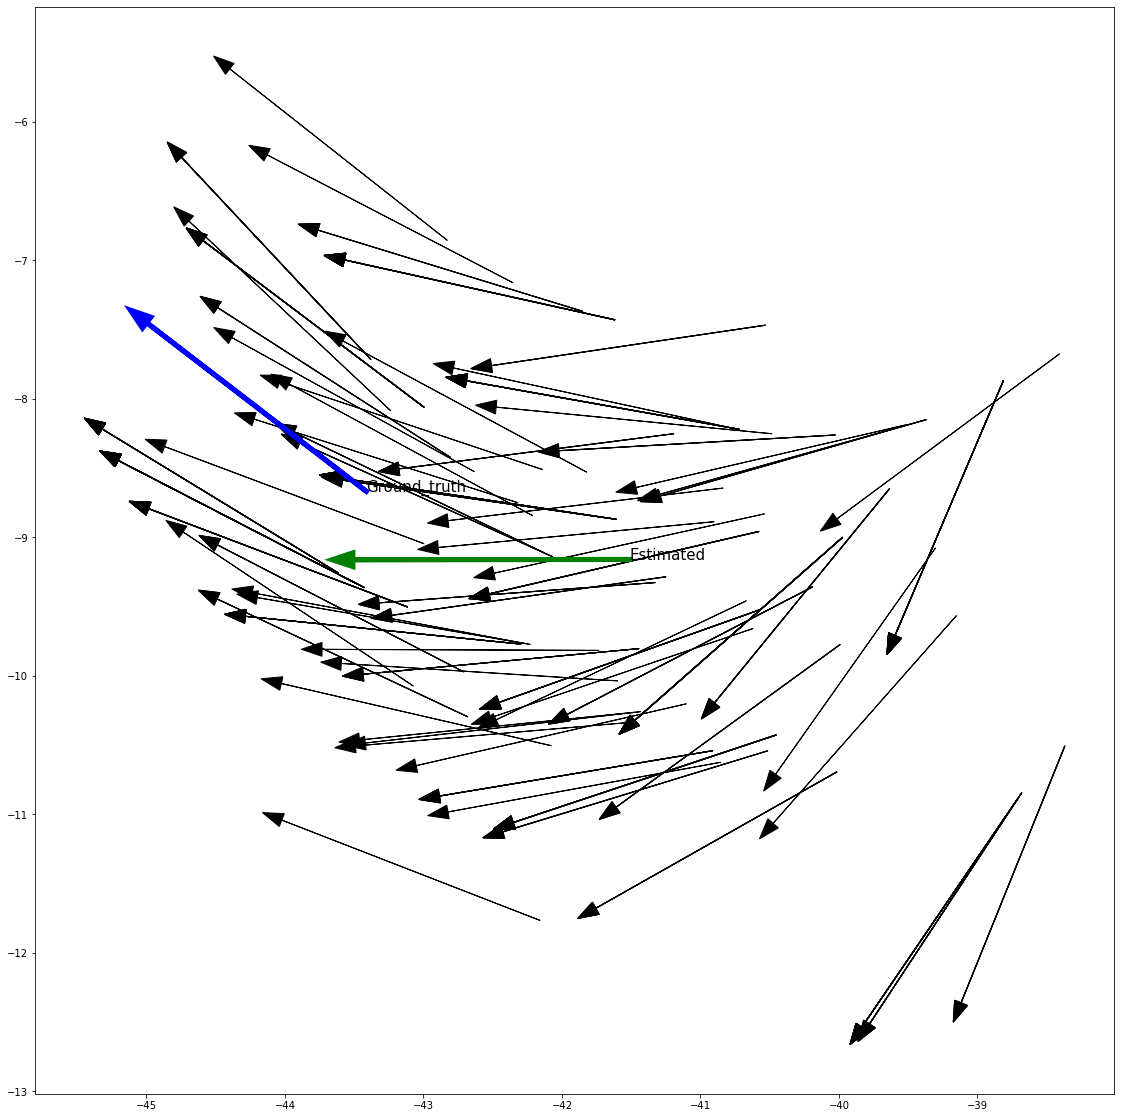

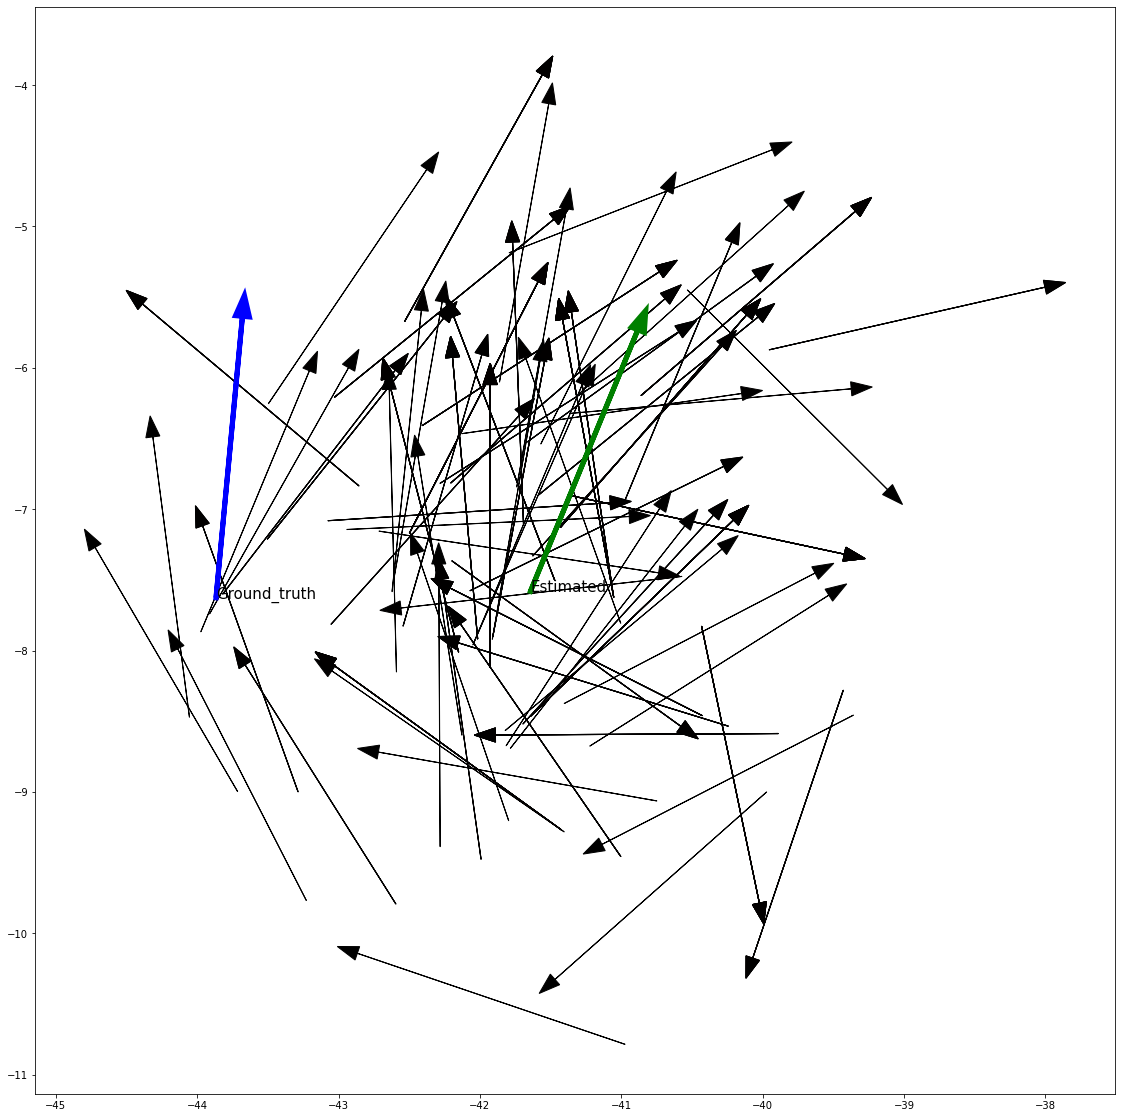

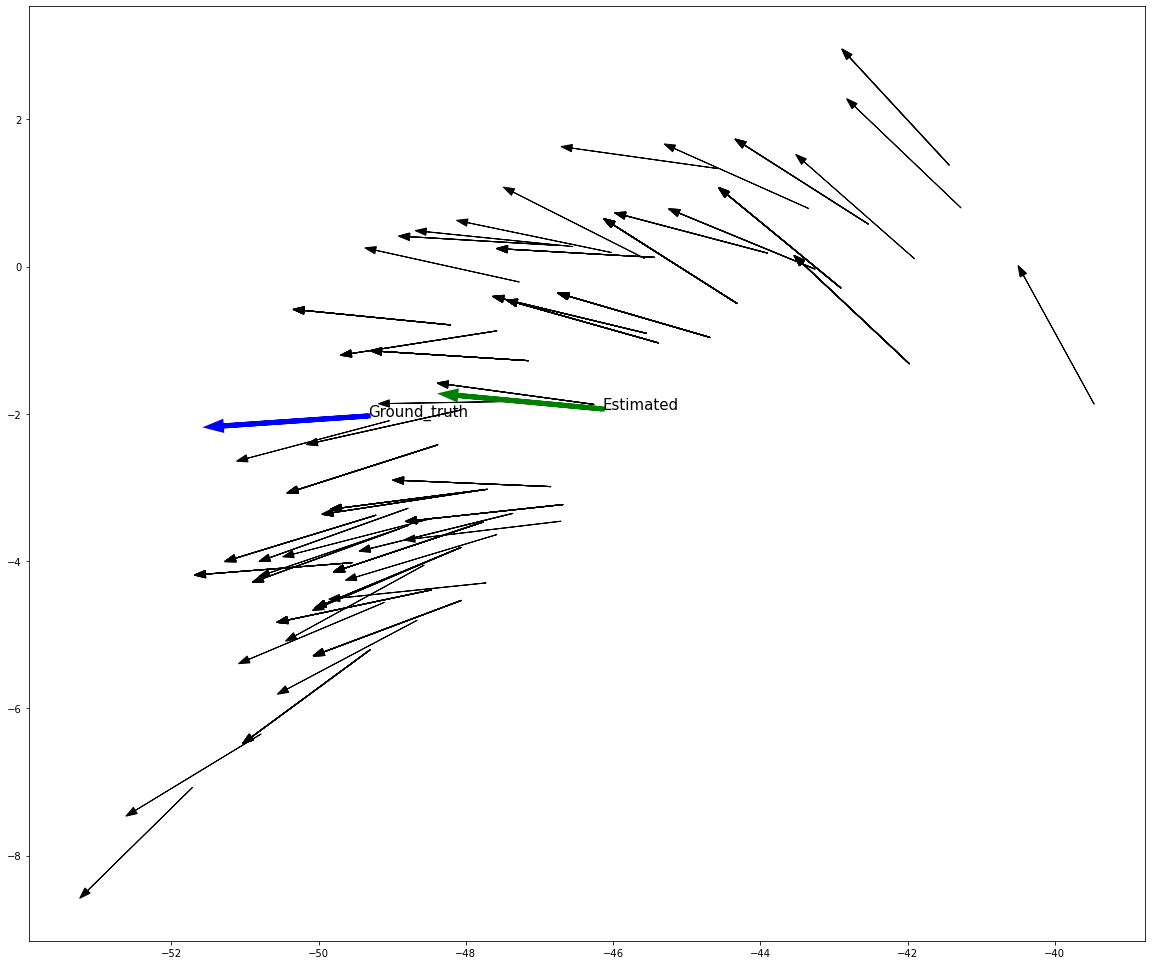

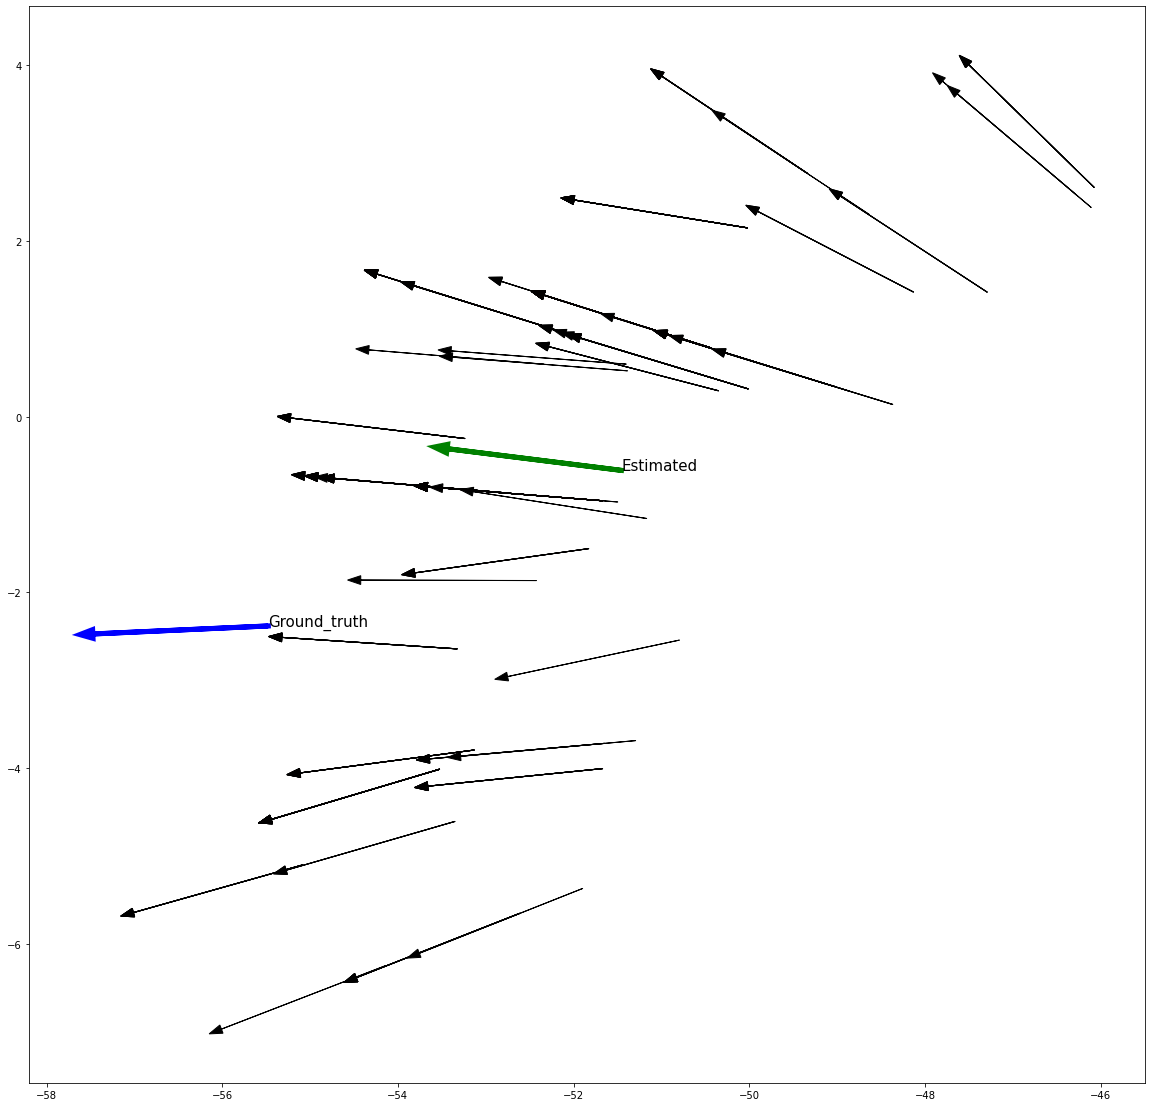

In [11]:
class ParticleFilterPlotter:
    def __init__(self, robot, particle_filter):
        self.robot = robot
        self.particle_filter = particle_filter
        
    def plot_robot(self):
        x = self.robot.x
        y = self.robot.y
        h = self.robot.heading
        l = self.robot.length
        plt.arrow(x, y, l * cos(h),
                  l * sin(h), color="blue", head_width=0.05*l, lw=5, label={})
        plt.gca().annotate(f'Ground_truth', xy=(x, y), xycoords='data', fontsize=15)        
        
    def plot_particles(self):
        for i, p in enumerate(self.particle_filter.particles):
            plt.arrow(p.rob.x, p.rob.y, p.rob.length * cos(p.rob.heading),
                      p.rob.length * sin(p.rob.heading), color=(p.weight,0,0), head_width=0.05*p.rob.length, label={})
            # plt.gca().annotate(f'w={p.weight:.5f}', xy=(p.rob.x, p.rob.y), xycoords='data', fontsize=15)
            
    def plot_estimated_pose(self, x, y, h):
        l = self.robot.length
        plt.arrow(x, y, l * cos(h),
                  l * sin(h), color="green", head_width=0.05*l, lw=5, label={})
        plt.gca().annotate(f'Estimated', xy=(x, y), xycoords='data', fontsize=15) 
            
def draw_next_plot():
    plt.figure(figsize=(20,20))
    # ax_min = -5
    # ax_max = 15
    # plt.xlim([-p_lim*3, p_lim*3])
    # plt.ylim([-p_lim*3, p_lim*3])
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    
        
bot = Robot(x0=0, y0=0, length=2, heading=0)
particle_filter = ParticleFilter(bot, 200)
pf_plotter = ParticleFilterPlotter(bot, particle_filter)

draw_next_plot()

# pf_plotter.plot_particles()
pf_plotter.plot_robot()

ref_sensed = bot.sense()

particle_filter.particles_sense()

particle_filter.update_particles_weights(ref_sensed)
pf_plotter.plot_particles()

est_x, est_y, est_heading = particle_filter.estimate_pose()
pf_plotter.plot_estimated_pose(est_x, est_y, est_heading)


for i in range(20):
    draw_next_plot()
    
    # Moving phase
    d = np.random.normal(5,5)
    s = np.random.normal(0, 0.5)
    bot.move(d, s)
    particle_filter.move_particles(d, s)
    
    # Measurement phase
    ref_sensed = bot.sense()
    particle_filter.particles_sense()
    particle_filter.update_particles_weights(ref_sensed)
    
    # Resampling phase
    particle_filter.resample()

    pf_plotter.plot_particles()
    pf_plotter.plot_robot()
    
    # Estimation phase
    est_x, est_y, est_heading = particle_filter.estimate_pose()
    pf_plotter.plot_estimated_pose(est_x, est_y, est_heading)

